In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
# from sklearn import preprocessing
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer,LabelEncoder
# from sklearn.compose import ColumnTransformer
# from xgboost import XGBRegressor
# from sklearn.model_selection import train_test_split
# from feature_engine.creation import CyclicalFeatures
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
# from sklearn.tree import DecisionTreeRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor

In [14]:
# Get the current directory path
current_directory = os.getcwd()

# Get the grandparent directory
grandparent_dir = os.path.abspath(os.path.join(current_directory, '..', 'src'))

# Add the parent directory to sys.path
parent_dir = os.path.join(grandparent_dir, 'flight_delay')
sys.path.append(parent_dir)

import pre_processing,train_utils

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
#load the data
data_path = '../data/flights_sample_3m.csv'
df_flights = pre_processing.load_data(data_path)

In [6]:
print(f"""
      number of rows    : {df_flights.shape[0]}
      number of columns : {df_flights.shape[1]}
      """)


      number of rows    : 3000000
      number of columns : 32
      


In [7]:
df_flights.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0.0,NaN,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0.0,NaN,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0.0,NaN,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0.0,NaN,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,0.0,NaN,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [8]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

In [10]:
#get nulls stat
pre_processing.create_nulls_stat(df_flights)

,column_name,nulls_number,null_percentage
0,FL_DATE,0,0.00
1,AIRLINE,0,0.00
2,AIRLINE_DOT,0,0.00
3,AIRLINE_CODE,0,0.00
4,DOT_CODE,0,0.00
5,FL_NUMBER,0,0.00
6,ORIGIN,0,0.00
7,ORIGIN_CITY,0,0.00
8,DEST,0,0.00
9,DEST_CITY,0,0.00


In [11]:
df_flights = pre_processing.pre_process(df_flights)

In [12]:
pre_processing.create_nulls_stat(df_flights)

,column_name,nulls_number,null_percentage
0,FL_DATE,0,0.0
1,AIRLINE,0,0.0
2,AIRLINE_CODE,0,0.0
3,ORIGIN,0,0.0
4,ORIGIN_CITY,0,0.0
5,DEST,0,0.0
6,DEST_CITY,0,0.0
7,CRS_DEP_TIME,0,0.0
8,DEP_TIME,0,0.0
9,DEP_DELAY,0,0.0


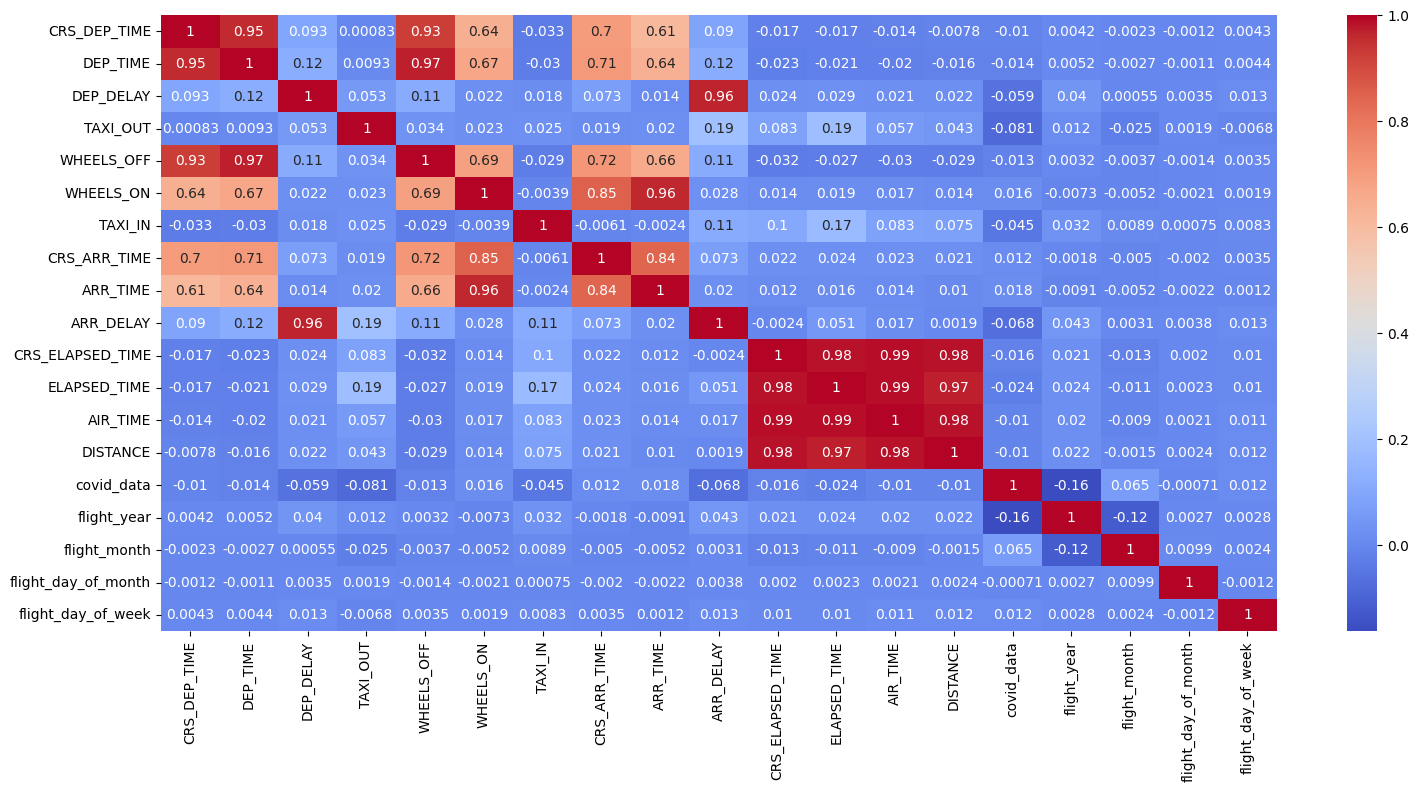

In [13]:
#get features correlations
numerical_cols = df_flights.select_dtypes(include=['number']).columns.tolist()

correlations = df_flights[numerical_cols].corr()

plt.figure(figsize=(18, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.show()


In [1]:
# df_flights.to_csv("../data/flights_delay_dataset.csv")